### Endeudamiento Crediticio

#### 1.- Librerías utilizadas

In [ ]:
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#import warnings
#warnings.filterwarnings('ignore')

#### 2.- Carga y dimensión de datos

In [ ]:
#Se importa los datos a utilizar
url_train = '/content/drive/MyDrive/Colab Notebooks/ENDEUDAMIENTO/2_DS_creditos.csv'
df_train = pd.read_csv(url_train, delimiter=";")
df_train.head(5)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Valores únicos
df_train['Default'].unique()

array([1, 0])

In [ ]:
#Verifico la cantidad de datos que hay en el dataset
print('Cantidad de datos:')
print(df_train.shape)

Cantidad de datos:
(150000, 12)


#### 3.- Entendimiento de datos

##### 3.1.- Valores nulos

In [ ]:
#Verifico el tipo de datos contenido en la data de entrenamiento
print('Tipos de datos:')
print(df_train.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB
None


In [ ]:
#Verifico los datos faltantes del dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64


In [ ]:
#Ratio de variables nulas
nulos_ratio = ((df_train.isnull().sum() / len(df_train))*100)
print(nulos_ratio)

ID                             0.000000
Default                        0.000000
Prct_uso_tc                    0.000000
Edad                           0.000000
Nro_prestao_retrasados         0.000000
Prct_deuda_vs_ingresos         0.000000
Mto_ingreso_mensual           19.820667
Nro_prod_financieros_deuda     0.000000
Nro_retraso_60dias             0.000000
Nro_creditos_hipotecarios      0.000000
Nro_retraso_ultm3anios         0.000000
Nro_dependiente                2.616000
dtype: float64


- Gran cantidad de valores nulos en la variable ***Mto_ingreso_mensual*** con 19.8 % (Requiere un tratamiento de datos).
- Menor cantidad de valores nulos en ***Nro_dependiente*** con 2.6 %

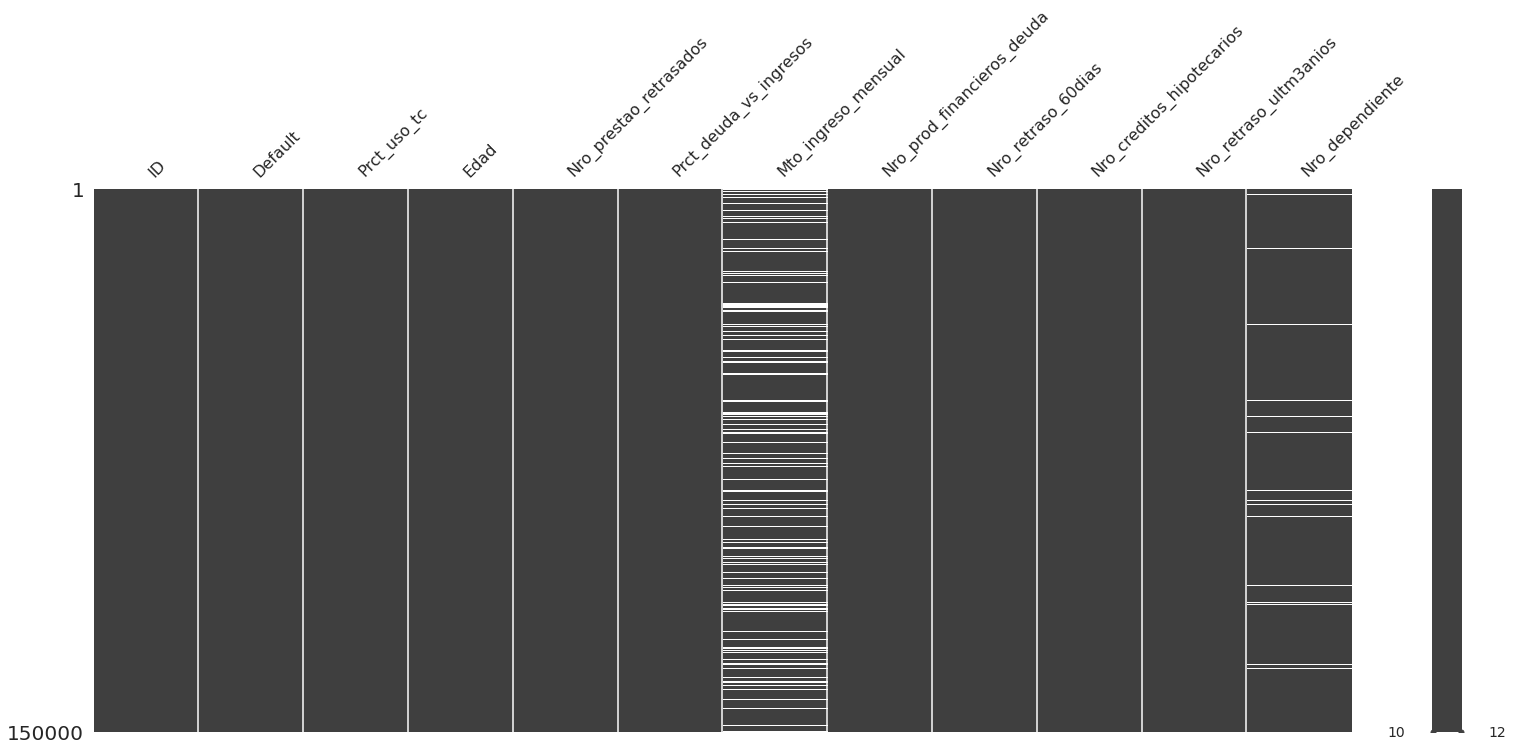

In [ ]:
#Visualizar la integriadad de los datos
import missingno as msno
%matplotlib inline
msno.matrix(df_train)

In [ ]:
#training_data_mean_replace = df_train.fillna((df_train.mean()))

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#training_data_median_replace = df_train.fillna((df_train.median()))

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


##### 3.2.- Variable Target

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    0.93316
1    0.06684
Name: Default, dtype: float64

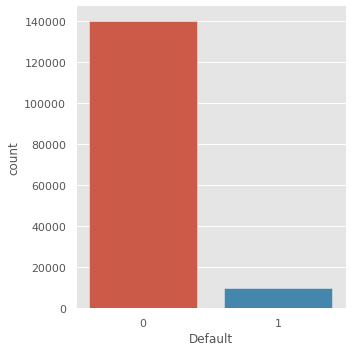

In [ ]:
sns.factorplot('Default',data=df_train,kind="count")
df_train['Default'].value_counts(1).sort_index()

- Aproximadamente el 7 % ha dejado de pagar su cuota.
- Alto desbalanceo de clases (Requiere un tratamiento de datos).

##### 3.3.- Variables cuantitativas

##### 3.3.1.- Medidas Estadísticas

In [ ]:
#Verifico las estadísticas de la dataset
print('Estadísticas del dataset:')
df_train.describe()

Estadísticas del dataset:


,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Valores atípicos en gran medida:
- Prct_uso_tc
- Prct_deuda_vs_ingresos
- Mto_ingreso_mensual

Valores atípicos en menor medida:
- Edad
- Nro_prod_financieros_deuda
- Nro_retraso_60dias
- Nro_retraso_ultm3anios

Analizamos las variables numéricas donde existen posibles valores atípicos

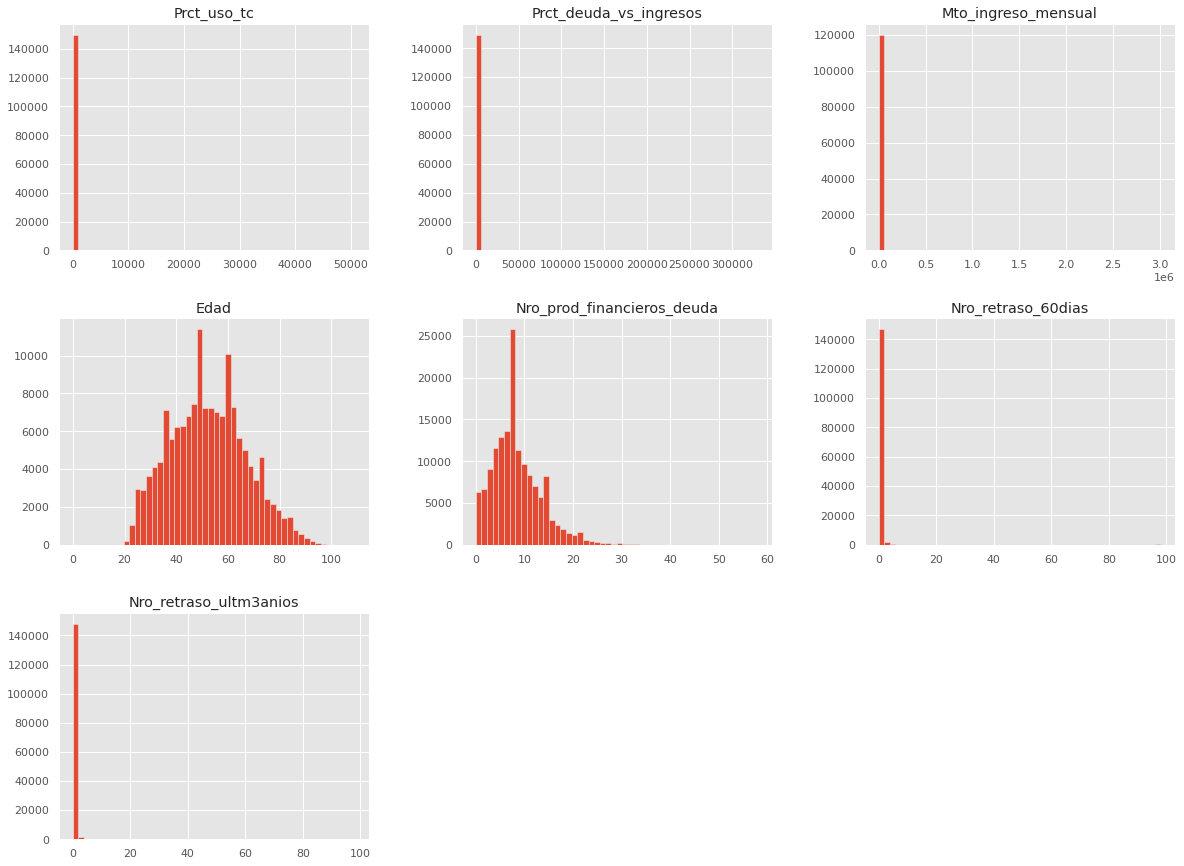

In [ ]:
#Valores atípicos
Variables = ['Prct_uso_tc','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Edad','Nro_prod_financieros_deuda','Nro_retraso_60dias','Nro_retraso_ultm3anios']
df_train[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

Requiere tratamiento de datos:
- Prct_uso_tc
- Prct_deuda_vs_ingresos
- Mto_ingreso_mensual
- Nro_retraso_60dias
- Nro_retraso_ultm3anios

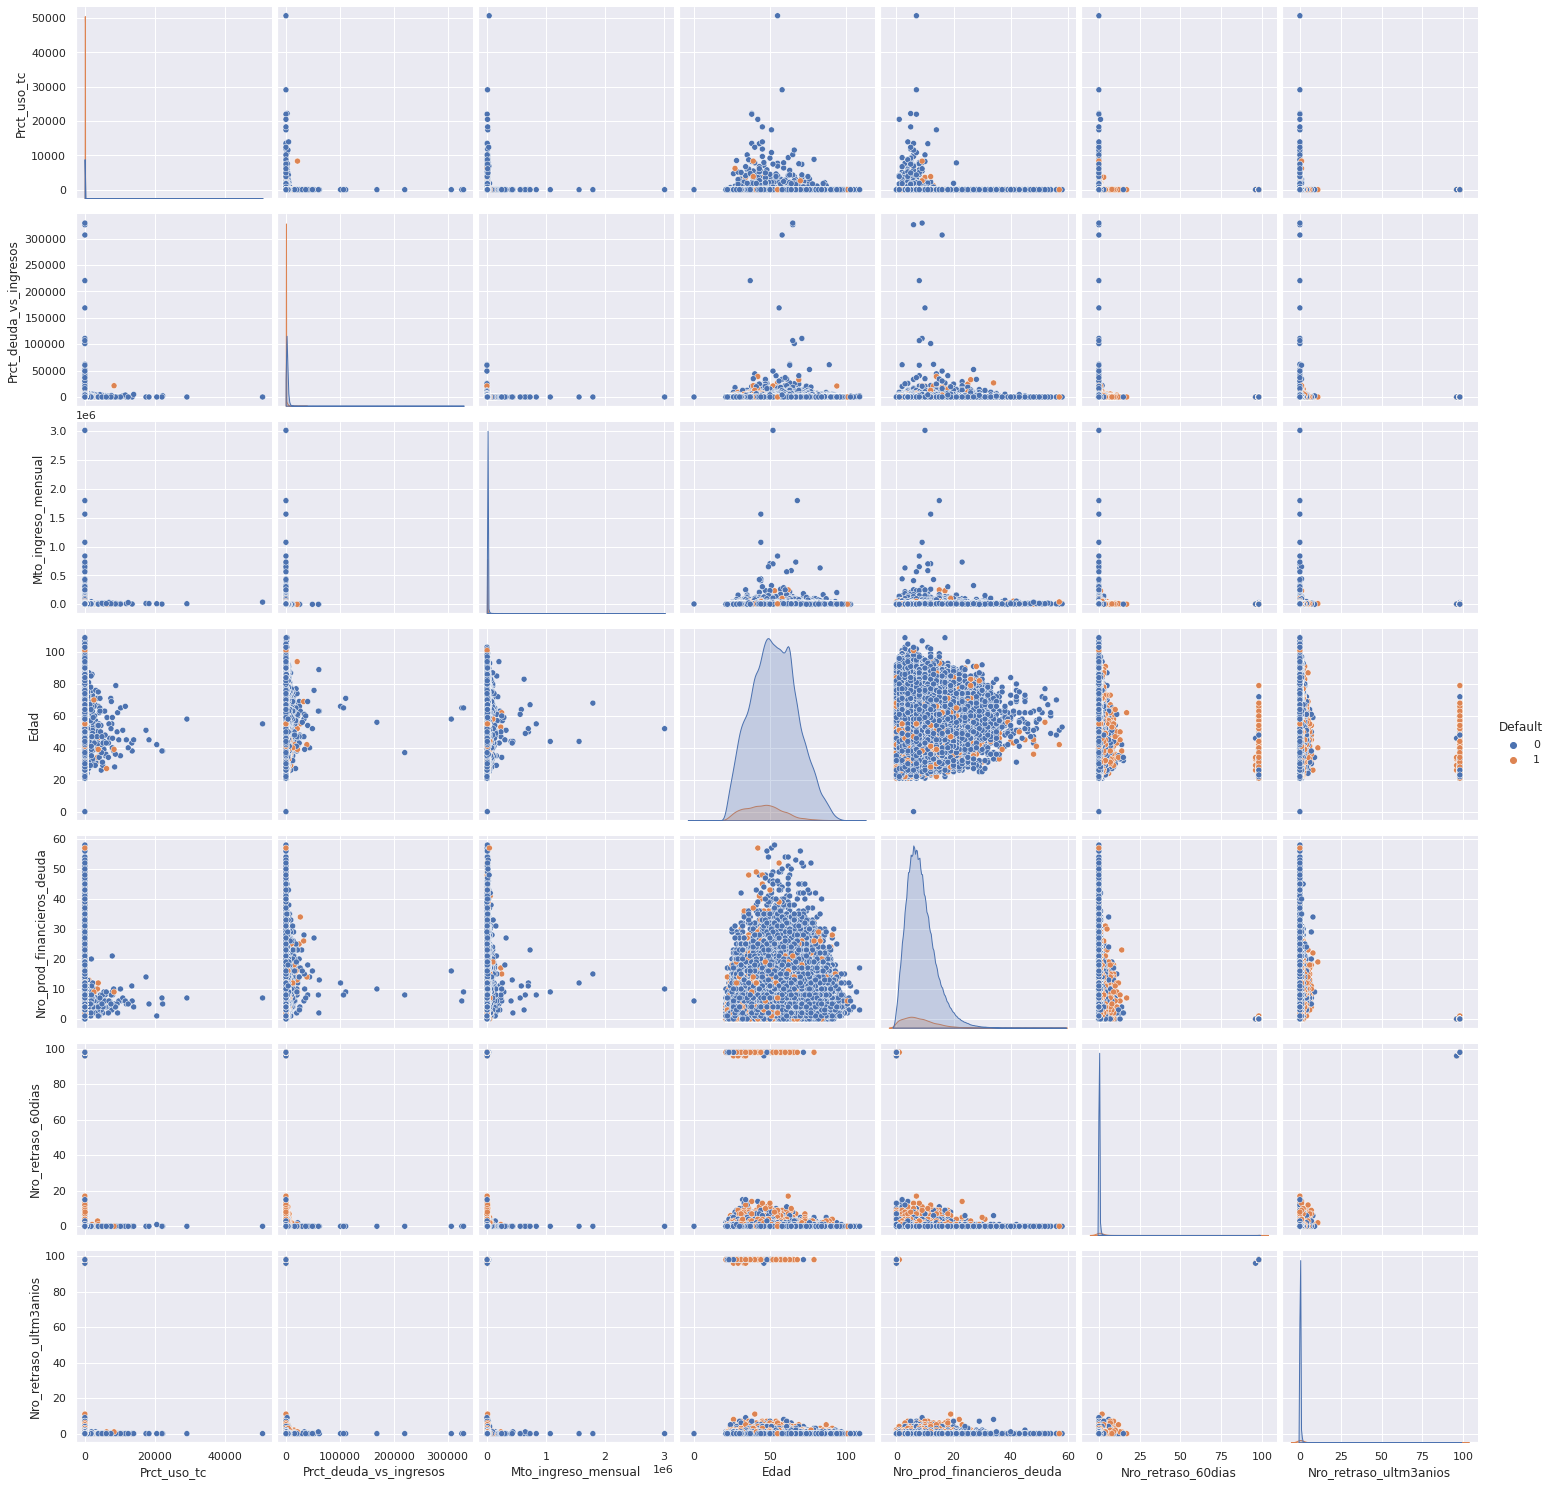

In [ ]:
Variables_train = ['Prct_uso_tc','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Edad','Nro_prod_financieros_deuda','Nro_retraso_60dias','Nro_retraso_ultm3anios','Default']
df_train[Variables_train]
sns.pairplot(df_train[Variables_train], hue = "Default",height=3,diag_kind="kde")

##### 3.3.2.- Correlaciones

Correlación con las variables atípicas.

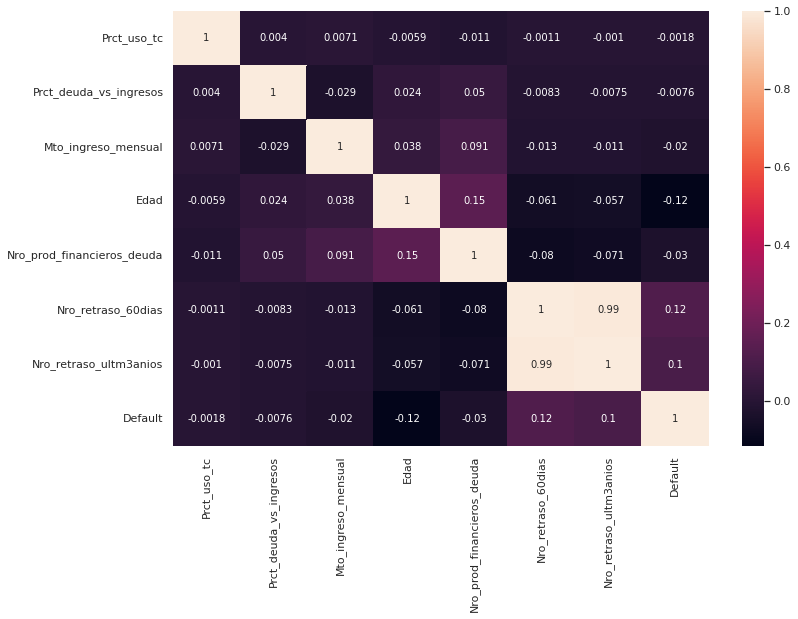

In [ ]:
corr = df_train[['Prct_uso_tc','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Edad','Nro_prod_financieros_deuda','Nro_retraso_60dias','Nro_retraso_ultm3anios','Default']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

**Asociación Lineal perfecta positiva**
- Nro_retraso_60dias (Muy  débil): 0.12
- Nro_retraso_ultm3anios (Muy  débil): 0.1

**Asociación Lineal perfecta negativa**
- Edad (Muy  débil): -0.12

Correlación con todas las variables

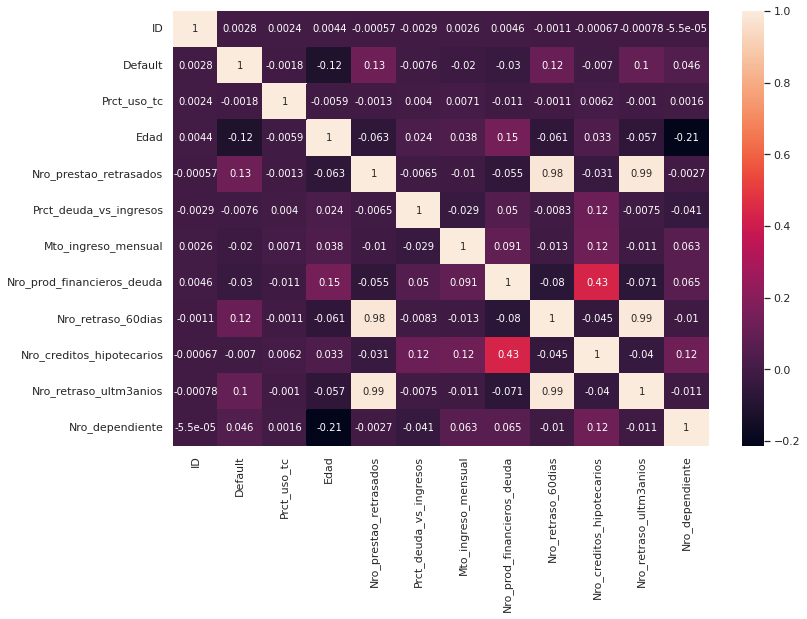

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

Aparece otra variable que tiene relación linel con el target
- Nro_prestao_retrasados (Muy débil): 0.13

Otros comportamientos
- Nro_retraso_60dias fuertemente relacionado con Nro_prestao_retrasados (0.98).
- Nro_retraso_ultm3anios fuertemente relacionado con Nro_prestao_retrasados (0.99).
- Nro_creditos_hipotecarios fuertemente relacionado con Nro_prod_financieros_deuda (0.43).
- Nro_prod_financieros_deuda fuertemente relacionado con Nro_creditos_hipotecarios (0.43).

#### 4.- Tratamiento de datos

##### 4.1.- NÚMERO DEPENDIENTE

In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64


In [ ]:
df_train.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


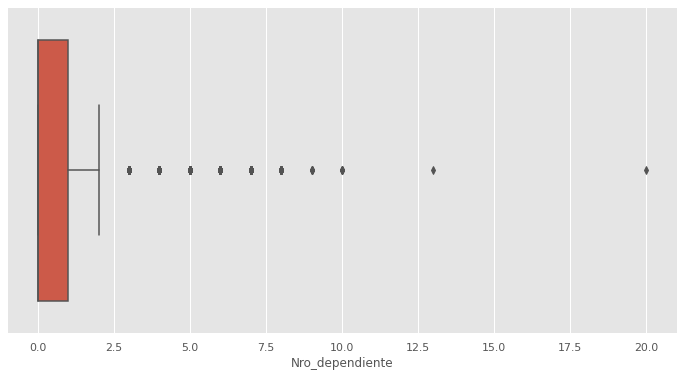

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente", data=df_train)

Varios valores atípicos

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


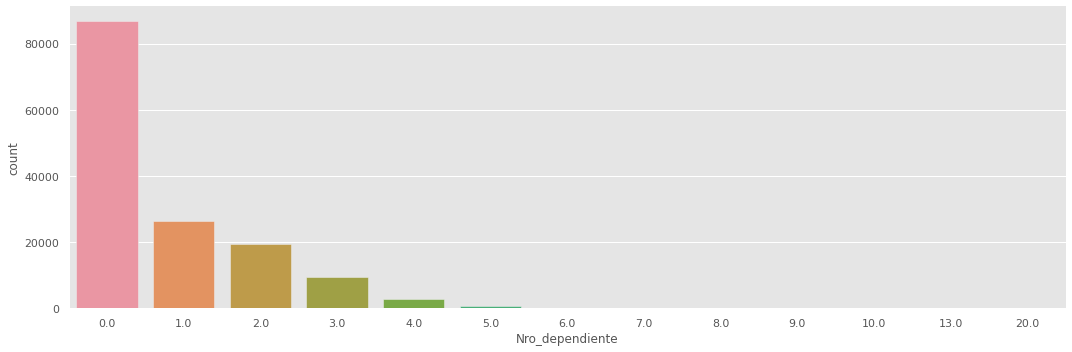

In [ ]:
sns.factorplot('Nro_dependiente',data=df_train,kind="count", aspect=3)

In [ ]:
Nro_dependiente_avg = df_train['Nro_dependiente'].mean()
Nro_dependiente_std = df_train['Nro_dependiente'].std()
Nro_dependiente_null_count = df_train['Nro_dependiente'].isnull().sum()
Nro_dependiente_null_random_list = np.random.randint(Nro_dependiente_avg - Nro_dependiente_std, Nro_dependiente_avg + Nro_dependiente_std, size=Nro_dependiente_null_count)

conValoresNulos = np.isnan(df_train['Nro_dependiente'])

df_train.loc[np.isnan(df_train['Nro_dependiente']), 'Nro_dependiente'] = Nro_dependiente_null_random_list
df_train['Nro_dependiente'] = df_train['Nro_dependiente'].astype(int)
print("Nro_dependiente Promedio: " + str(Nro_dependiente_avg))
print("Desvió Std Nro_dependiente: " + str(Nro_dependiente_std))
print("Intervalo para asignar Nro_dependiente aleatorio: " + str(int(Nro_dependiente_avg - Nro_dependiente_std)) + " a " + str(int(Nro_dependiente_avg + Nro_dependiente_std)))

Nro_dependiente Promedio: 0.7572222678605657
Desvió Std Nro_dependiente: 1.1150860714872997
Intervalo para asignar Nro_dependiente aleatorio: 0 a 1


In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    return(x)

df_train_tratamiento = df_train[['Nro_dependiente']].apply(lambda x: outlier_capping(x))
df_train = pd.concat([df_train.drop(columns=['Nro_dependiente']), df_train_tratamiento], axis=1,)
df_train.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.702453
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.001375
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,3.000000


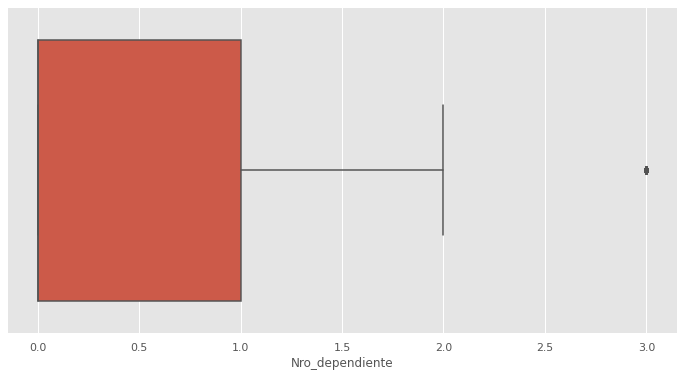

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente", data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


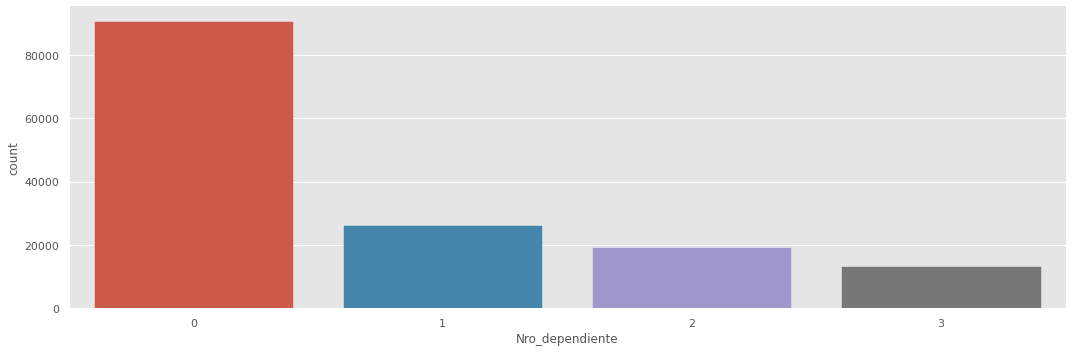

In [ ]:
sns.factorplot('Nro_dependiente',data=df_train,kind="count", aspect=3)

In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                   0
dtype: int64


##### 4.2.- MONTO INGRESO MENSUAL

In [ ]:
mto_avg = df_train['Mto_ingreso_mensual'].mean()
mto_std = df_train['Mto_ingreso_mensual'].std()
mto_null_count = df_train['Mto_ingreso_mensual'].isnull().sum()
mto_null_random_list = np.random.randint(mto_avg, mto_avg + mto_std, size=mto_null_count)

#conValoresNulos = np.isnan(df_train['Mto_ingreso_mensual'])

#df_train.loc[np.isnan(df_train['Mto_ingreso_mensual']), 'Mto_ingreso_mensual'] = mto_null_random_list
#df_train['Mto_ingreso_mensual'] = df_train['Mto_ingreso_mensual'].astype(float)
print("Ingreso Promedio: " + str(mto_avg))
print("Desvió Std Ingreso: " + str(mto_std))
print("Intervalo para asignar Ingreso aleatorio: " + str(int(mto_avg - mto_std)) + " a " + str(int(mto_avg + mto_std)))

Ingreso Promedio: 6670.221237392844
Desvió Std Ingreso: 14384.674215282244
Intervalo para asignar Ingreso aleatorio: -7714 a 21054


***SI UTILIZO EL AJUSTE APRENDIDO EN CLASE PARA LA VARIABLE Mto_ingreso_mensual no va a funcionar. PORQUE LA DISPERSIÓN ES DEMASIADO GRANDE QUE EL MONTO PROMEDIO, DÁNDOME VALORES NEGATIVOS.
ESTO SUCEDE POR LA GRAN CANTIDAD DE VALORES ATÍPICOS.***
PRIMERO DEBO TRATAR LOS VALORES ATÍPICOS ANTES DE TRATAR LOS VALORES NULOS.

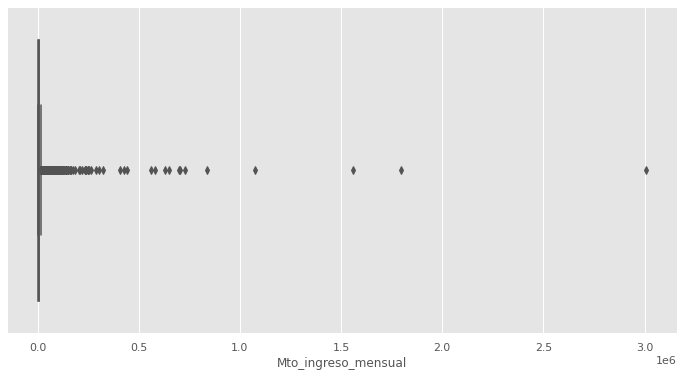

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Mto_ingreso_mensual", data=df_train)

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    return(x)

df_train_tratamiento = df_train[['Mto_ingreso_mensual']].apply(lambda x: outlier_capping(x))
df_train = pd.concat([df_train.drop(columns=['Mto_ingreso_mensual']), df_train_tratamiento], axis=1)
df_train.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Mto_ingreso_mensual
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,8.452760,0.265973,1.018240,0.240387,0.702453,6115.362840
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,5.145951,4.169304,1.129771,4.155179,1.001375,3646.059375
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,5.000000,0.000000,0.000000,0.000000,0.000000,3400.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,8.000000,0.000000,1.000000,0.000000,0.000000,5400.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,11.000000,0.000000,2.000000,0.000000,1.000000,8249.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,58.000000,98.000000,54.000000,98.000000,3.000000,14587.600000


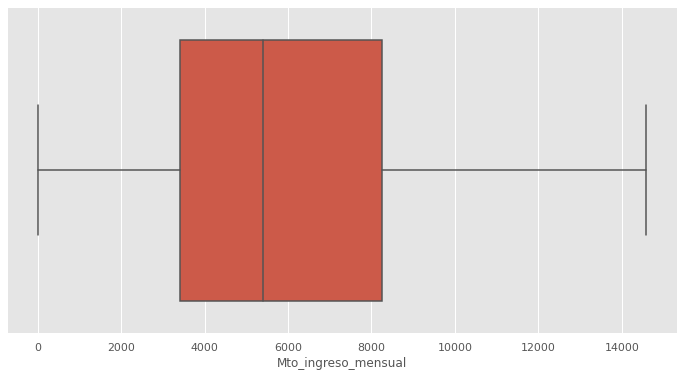

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Mto_ingreso_mensual", data=df_train_tratamiento)

In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                   0
Mto_ingreso_mensual           29731
dtype: int64


In [ ]:
mto_avg = df_train['Mto_ingreso_mensual'].mean()
mto_std = df_train['Mto_ingreso_mensual'].std()
mto_null_count = df_train['Mto_ingreso_mensual'].isnull().sum()
mto_null_random_list = np.random.randint(mto_avg, mto_avg + mto_std, size=mto_null_count)

#conValoresNulos = np.isnan(df_train['Mto_ingreso_mensual'])

df_train.loc[np.isnan(df_train['Mto_ingreso_mensual']), 'Mto_ingreso_mensual'] = mto_null_random_list
df_train['Mto_ingreso_mensual'] = df_train['Mto_ingreso_mensual'].astype(float)
print("Ingreso Promedio: " + str(mto_avg))
print("Desvió Std Ingreso: " + str(mto_std))
print("Intervalo para asignar Ingreso aleatorio: " + str(int(mto_avg - mto_std)) + " a " + str(int(mto_avg + mto_std)))

Ingreso Promedio: 6115.362839967753
Desvió Std Ingreso: 3646.0593746662676
Intervalo para asignar Ingreso aleatorio: 2469 a 9761


In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                            0
Default                       0
Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
Mto_ingreso_mensual           0
dtype: int64


##### 4.3.- PORCENTAJE DE USO DE TARJETA

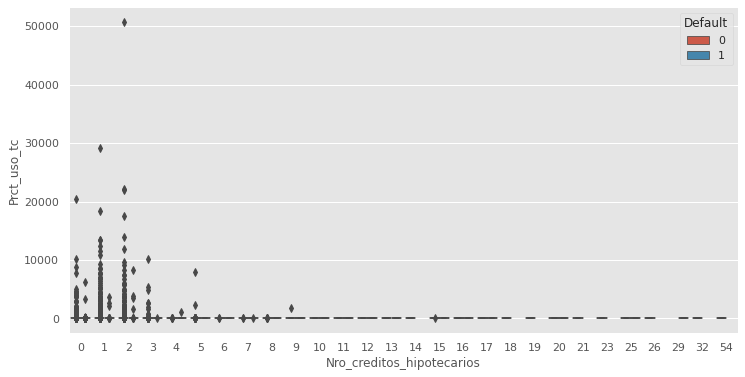

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_creditos_hipotecarios",y="Prct_uso_tc", hue="Default", data=df_train)

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    return(x)

df_train_tratamiento = df_train[['Prct_uso_tc']].apply(lambda x: outlier_capping(x))
df_train = pd.concat([df_train.drop(columns=['Prct_uso_tc']), df_train_tratamiento], axis=1,)
df_train.describe()

,ID,Default,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Mto_ingreso_mensual,Prct_uso_tc
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,52.295207,0.421033,353.005076,8.452760,0.265973,1.018240,0.240387,0.702453,6475.104956,0.319196
std,43301.414527,0.249746,14.771866,4.192781,2037.818523,5.145951,4.169304,1.129771,4.155179,1.001375,3376.393545,0.349481
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,0.000000,0.175074,5.000000,0.000000,0.000000,0.000000,0.000000,3903.000000,0.029867
50%,75000.500000,0.000000,52.000000,0.000000,0.366508,8.000000,0.000000,1.000000,0.000000,0.000000,6399.000000,0.154181
75%,112500.250000,0.000000,63.000000,0.000000,0.868254,11.000000,0.000000,2.000000,0.000000,1.000000,8531.000000,0.559046
max,150000.000000,1.000000,109.000000,98.000000,329664.000000,58.000000,98.000000,54.000000,98.000000,3.000000,14587.600000,1.000000


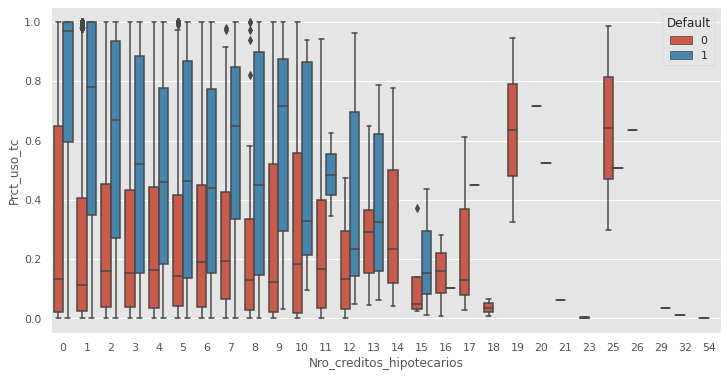

In [ ]:
#como quedó ahora Prct_uso_tc
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_creditos_hipotecarios",y="Prct_uso_tc", hue="Default", data=df_train)

##### 4.4.- PORCENTAJE DEUDA VS INGRESOS

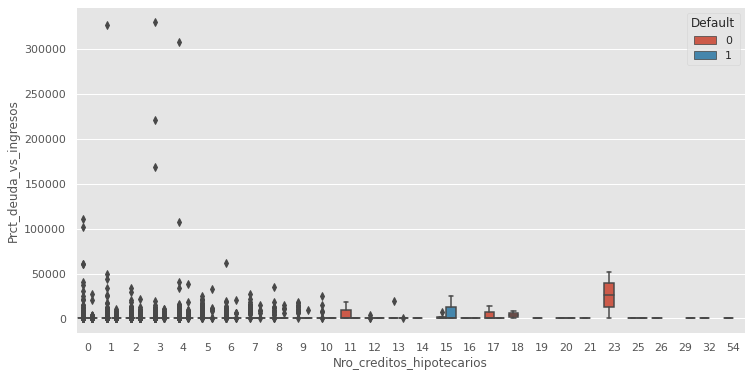

In [ ]:
#Hacer lo mismo hacer para Prct_deuda_vs_ingresos
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_creditos_hipotecarios",y="Prct_deuda_vs_ingresos", hue="Default", data=df_train)

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    return(x)

df_train_tratamiento = df_train[['Prct_deuda_vs_ingresos']].apply(lambda x: outlier_capping(x))
df_train = pd.concat([df_train.drop(columns=['Prct_deuda_vs_ingresos']), df_train_tratamiento], axis=1,)
df_train.describe()

,ID,Default,Edad,Nro_prestao_retrasados,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Mto_ingreso_mensual,Prct_uso_tc,Prct_deuda_vs_ingresos
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,52.295207,0.421033,8.452760,0.265973,1.018240,0.240387,0.702453,6475.104956,0.319196,254.635916
std,43301.414527,0.249746,14.771866,4.192781,5.145951,4.169304,1.129771,4.155179,1.001375,3376.393545,0.349481,662.435683
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3903.000000,0.029867,0.175074
50%,75000.500000,0.000000,52.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,6399.000000,0.154181,0.366508
75%,112500.250000,0.000000,63.000000,0.000000,11.000000,0.000000,2.000000,0.000000,1.000000,8531.000000,0.559046,0.868254
max,150000.000000,1.000000,109.000000,98.000000,58.000000,98.000000,54.000000,98.000000,3.000000,14587.600000,1.000000,2449.000000


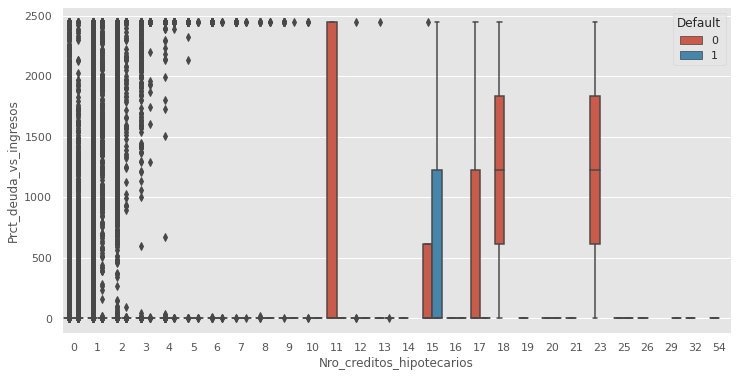

In [ ]:
#como quedó ahora Prct_deuda_vs_ingresos
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_creditos_hipotecarios",y="Prct_deuda_vs_ingresos", hue="Default", data=df_train)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Nro_prod_financieros_deuda  150000 non-null  int64  
 5   Nro_retraso_60dias          150000 non-null  int64  
 6   Nro_creditos_hipotecarios   150000 non-null  int64  
 7   Nro_retraso_ultm3anios      150000 non-null  int64  
 8   Nro_dependiente             150000 non-null  int64  
 9   Mto_ingreso_mensual         120269 non-null  float64
 10  Prct_uso_tc                 150000 non-null  float64
 11  Prct_deuda_vs_ingresos      150000 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


##### 4.5.- COMPORTAMIENTO

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Default                
                  count   sum      mean
Nro_dependiente                        
0                 90826  5274  0.058067
1                 26316  1935  0.073529
2                 19522  1584  0.081139
3                 13336  1233  0.092457

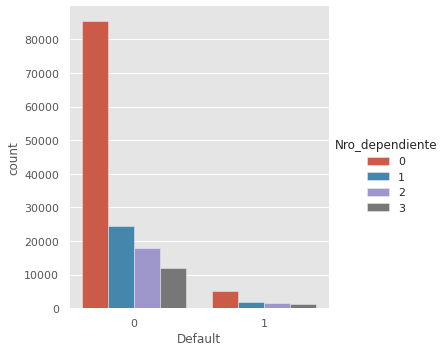

In [ ]:
sns.factorplot('Default',data=df_train,hue='Nro_dependiente',kind="count")
df_train[['Nro_dependiente','Default']].groupby(['Nro_dependiente'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Default              
       count sum      mean
Edad                      
0          1   0  0.000000
21       183  13  0.071038
22       434  36  0.082949
23       641  70  0.109204
24       816  98  0.120098
...      ...  ..       ...
102        3   0  0.000000
103        3   0  0.000000
105        1   0  0.000000
107        1   0  0.000000
109        2   0  0.000000

[86 rows x 3 columns]

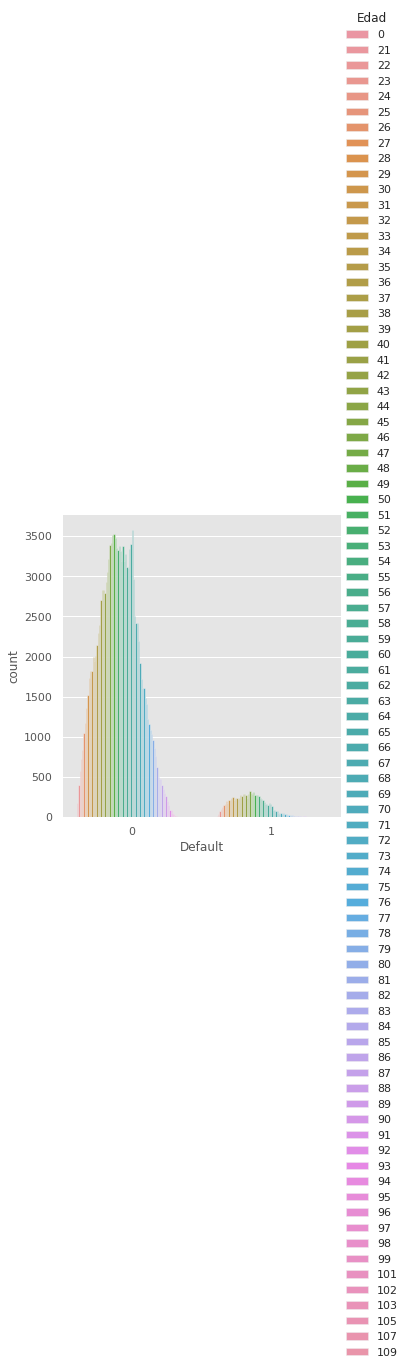

In [ ]:
sns.factorplot('Default',data=df_train,hue='Edad',kind="count")
df_train[['Edad','Default']].groupby(['Edad'], as_index=False).agg(['count','sum','mean'])

##### 4.6.- MAPEO DE EDADES

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Nro_prod_financieros_deuda  150000 non-null  int64  
 5   Nro_retraso_60dias          150000 non-null  int64  
 6   Nro_creditos_hipotecarios   150000 non-null  int64  
 7   Nro_retraso_ultm3anios      150000 non-null  int64  
 8   Nro_dependiente             150000 non-null  int64  
 9   Mto_ingreso_mensual         150000 non-null  float64
 10  Prct_uso_tc                 150000 non-null  float64
 11  Prct_deuda_vs_ingresos      150000 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


In [ ]:
df_train['Edad'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: Edad, dtype: float64

In [ ]:
'''rangos = [0, 20, 27, 34, 41, 110]
grupos = ["0", "1", "2", "3", "4"]
df_train['Edad'] = pd.cut(df_train['Edad'], rangos, labels = grupos)'''

df_train.loc[ df_train['Edad'] <= 21, 'Edad'] 					       = 0
df_train.loc[(df_train['Edad'] > 21) & (df_train['Edad'] <= 26), 'Edad'] = 1
df_train.loc[(df_train['Edad'] > 26) & (df_train['Edad'] <= 30), 'Edad'] = 2
df_train.loc[(df_train['Edad'] > 30) & (df_train['Edad'] <= 40), 'Edad'] = 3
df_train.loc[ df_train['Edad'] > 40, 'Edad'] = 4

In [ ]:
df_train

,ID,Default,Edad,Nro_prestao_retrasados,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Mto_ingreso_mensual,Prct_uso_tc,Prct_deuda_vs_ingresos
0,1,1,4,2,13,0,6,0,2,9120.0,0.766127,0.802982
1,2,0,3,0,4,0,0,0,1,2600.0,0.957151,0.121876
2,3,0,3,1,2,1,0,0,0,3042.0,0.658180,0.085113
3,4,0,2,0,5,0,0,0,0,3300.0,0.233810,0.036050
4,5,0,4,1,7,0,1,0,0,14587.6,0.907239,0.024926
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,4,0,4,0,1,0,0,2100.0,0.040674,0.225131
149996,149997,0,4,0,4,0,1,0,2,5584.0,0.299745,0.716562
149997,149998,0,4,0,18,0,1,0,0,8617.0,0.246044,2449.000000
149998,149999,0,2,0,4,0,0,0,0,5716.0,0.000000,0.000000


In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                            0
Default                       0
Edad                          0
Nro_prestao_retrasados        0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
Mto_ingreso_mensual           0
Prct_uso_tc                   0
Prct_deuda_vs_ingresos        0
dtype: int64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Nro_prod_financieros_deuda  150000 non-null  int64  
 5   Nro_retraso_60dias          150000 non-null  int64  
 6   Nro_creditos_hipotecarios   150000 non-null  int64  
 7   Nro_retraso_ultm3anios      150000 non-null  int64  
 8   Nro_dependiente             150000 non-null  int64  
 9   Mto_ingreso_mensual         150000 non-null  float64
 10  Prct_uso_tc                 150000 non-null  float64
 11  Prct_deuda_vs_ingresos      150000 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


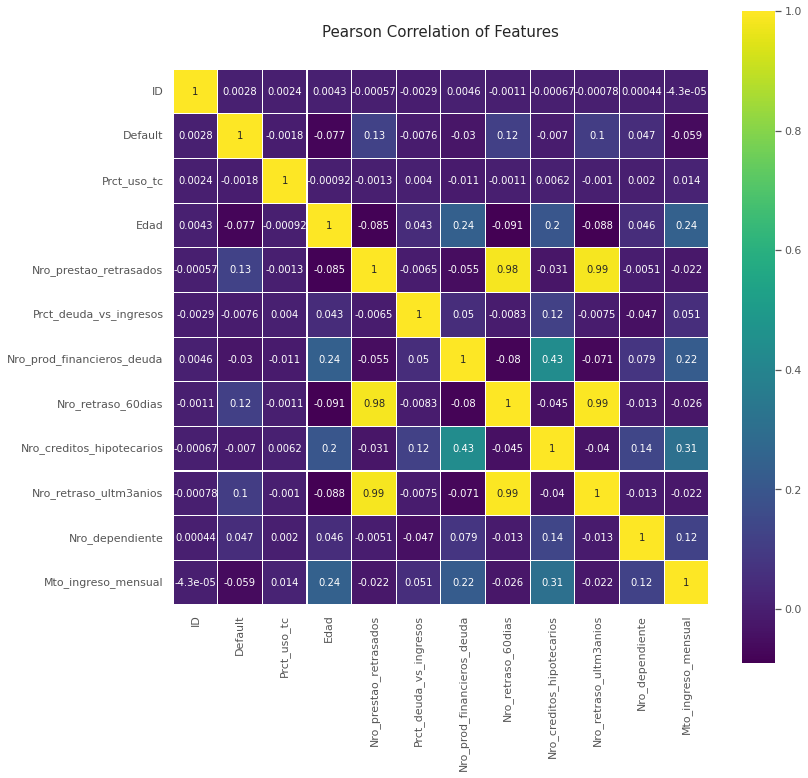

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
ID                            0
Default                       0
Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
Mto_ingreso_mensual           0
dtype: int64


##### 4.1.- MODELADO ANTIGUO (OMITIR)

In [ ]:
'''df_train['Mto_ingreso_mensual'].describe()'''
'''print(df_train["Mto_ingreso_mensual"].mean())'''

6670.221237392844


In [ ]:
#Reemplazo los datos faltantes en la Mto_ingreso_mensual por la media de esta columna
'''print(df_train["Mto_ingreso_mensual"].mean())
promedio_Mto_ingreso_mensual = 6670
df_train['Mto_ingreso_mensual'] = df_train['Mto_ingreso_mensual'].replace(np.nan, promedio_Mto_ingreso_mensual)'''

6670.221237392844


In [ ]:
#Reemplazo los datos faltantes en la edad por la media de esta columna
'''print(df_train["Nro_dependiente"].mean())
promedio_Nro_dependiente = 1
df_train['Nro_dependiente'] = df_train['Nro_dependiente'].replace(np.nan, promedio_Nro_dependiente)'''

0.7572222678605657


In [ ]:
#Verifico los datos
'''print(pd.isnull(df_train).sum())
print(df_train.shape)
print(df_train.head())'''

In [ ]:
'''X = df_train.loc[:,
                  ['ID',
                  'Prct_uso_tc',
                  'Edad',
                  'Nro_prestao_retrasados',
                  'Prct_deuda_vs_ingresos',
                  'Mto_ingreso_mensual',
                  'Nro_prod_financieros_deuda',
                  'Nro_retraso_60dias',
                  'Nro_creditos_hipotecarios',
                  'Nro_retraso_ultm3anios',
                  'Nro_dependiente'
                  ]
                ]
Y = df_train.loc[:, ['Default']]
#Otra forma
#X = np.array(df_train.drop(['Default'], 1))
#Y = np.array(df_train['Default'])'''

In [ ]:
#Entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0, stratify=Y)


In [ ]:
'''##Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, Y_train))
##Support Vector Machines
#svc = SVC()
#svc.fit(X_train, Y_train)
#Y_pred = svc.predict(X_test)
#print('Precisión Soporte de Vectores:')
#print(svc.score(X_train, Y_train))
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, Y_train))'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Precisión Regresión Logística:
0.9331809523809523
Precisión Vecinos más Cercanos:
0.9376857142857142


In [ ]:
'''ids = df_train['ID']
##Regresión logística
prediccion_logreg = logreg.predict(df_train.drop('ID', axis=1))
out_logreg = pd.DataFrame({ 'ID' : ids, 'Default': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head())
##Support Vector Machines
#prediccion_svc = svc.predict(df_train.drop('ID', axis=1))
#out_svc = pd.DataFrame({ 'ID' : ids, 'Default': prediccion_svc })
#print('Predicción Soporte de Vectores:')
#print(out_svc.head())
##K neighbors
prediccion_knn = knn.predict(df_train.drop('ID', axis=1))
out_knn = pd.DataFrame({ 'ID' : ids, 'Default': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())

out_knn.to_csv("/content/prediction_neighbors.csv")'''


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Default
Feature names seen at fit time, yet now missing:
- ID

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Default
Feature names seen at fit time, yet now missing:
- ID

  warnings.warn(message, FutureWarning)


Predicción Regresión Logística:
   ID  Default
0   1        1
1   2        1
2   3        1
3   4        1
4   5        1
Predicción Vecinos más Cercanos:
   ID  Default
0   1        0
1   2        0
2   3        0
3   4        0
4   5        0


In [ ]:
'''out_logreg.to_csv("/content/prediccion_logreg.csv")'''

In [ ]:
'''df_train.describe()'''

#### 5.- Balanceo de datos


In [ ]:
df_train.columns

Index(['ID', 'Default', 'Edad', 'Nro_prestao_retrasados',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Mto_ingreso_mensual', 'Prct_uso_tc',
       'Prct_deuda_vs_ingresos'],
      dtype='object')

In [ ]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = df_train[['Prct_uso_tc', 'Edad', 
              'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos',
              'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
              'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios',
              'Nro_dependiente', 'Mto_ingreso_mensual']]
y = df_train[['Default']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [ ]:
df_train_ = pd.concat([X_train,y_train],axis=1)
df_train_.head(3)

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Mto_ingreso_mensual,Default
115079,1.000000,3,0,0.533164,5,0,2,0,0,14587.6,0
19186,0.538860,4,0,0.374115,7,0,2,0,0,5083.0,0
54905,0.301048,4,0,0.280083,5,0,1,0,0,8700.0,0


In [ ]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train_.Default.value_counts()

# Divide by class
df_class_0 = df_train_[df_train_['Default'] == 0]
df_class_1 = df_train_[df_train_['Default'] == 1]
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(90979, 90979, 6521, 6521)

##### 5.1.- UnderSampling

Estrategia de Muestreo under-sampling:
1    6521
0    6521
Name: Default, dtype: int64


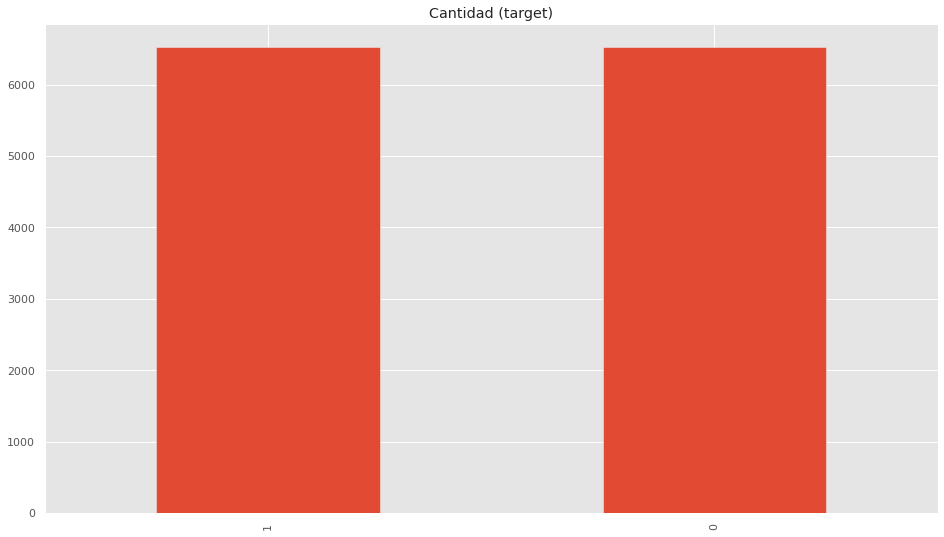

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train_under.Default.value_counts())

df_train_under.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

##### 5.1.- OverSampling

Random over-sampling:
1    90979
0    90979
Name: Default, dtype: int64


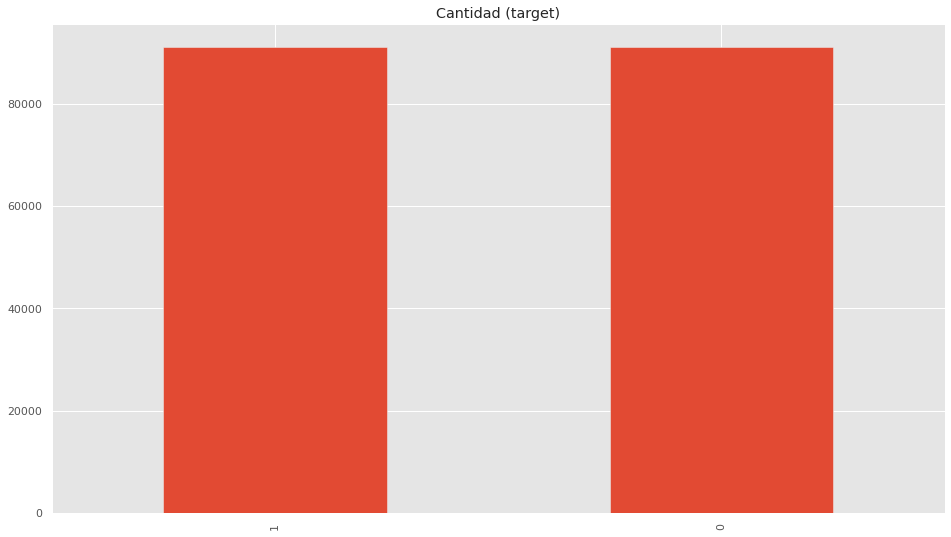

In [ ]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Default.value_counts())

df_train_over.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

#### 6.- Modelado

##### 6.1.- Datos originales

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 89.80%
Log Loss: 3.523656404301534


Matriz de Confusión - DATOS ORIGINALES:
 [[46150  2845]
 [ 2511   994]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     48995
           1       0.26      0.28      0.27      3505

    accuracy                           0.90     52500
   macro avg       0.60      0.61      0.61     52500
weighted avg       0.90      0.90      0.90     52500



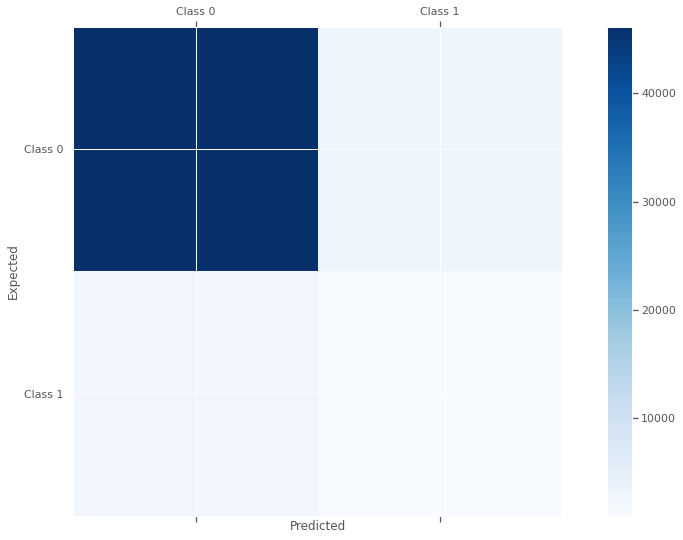

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

##### 6.2.- UNDER SAMPLING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_train_under[['Prct_uso_tc', 'Edad', 
              'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos',
              'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
              'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios',
              'Nro_dependiente', 'Mto_ingreso_mensual']]
y_train_u = df_train_under[['Default']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 69.81%
Log Loss: 10.42764609354982


Matriz de Confusión UNDERSAMPLING:
 [[34220 14775]
 [ 1075  2430]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     48995
           1       0.14      0.69      0.23      3505

    accuracy                           0.70     52500
   macro avg       0.56      0.70      0.52     52500
weighted avg       0.91      0.70      0.77     52500



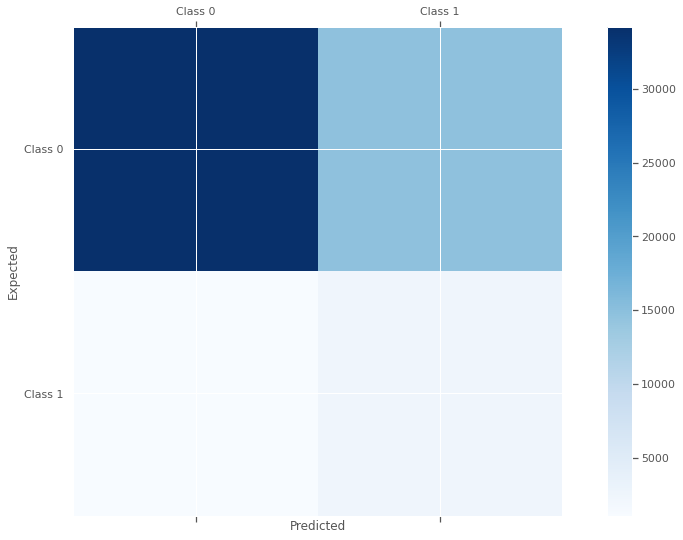

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

##### 6.2.- OVER SAMPLING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= df_train_over[['Prct_uso_tc', 'Edad', 
              'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos',
              'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
              'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios',
              'Nro_dependiente', 'Mto_ingreso_mensual']]
y_train_o = df_train_over[['Default']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 90.36%
Log Loss: 3.3308918225260684


Matriz de Confusión OVERSAMPLING:
 [[46499  2496]
 [ 2567   938]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     48995
           1       0.27      0.27      0.27      3505

    accuracy                           0.90     52500
   macro avg       0.61      0.61      0.61     52500
weighted avg       0.90      0.90      0.90     52500



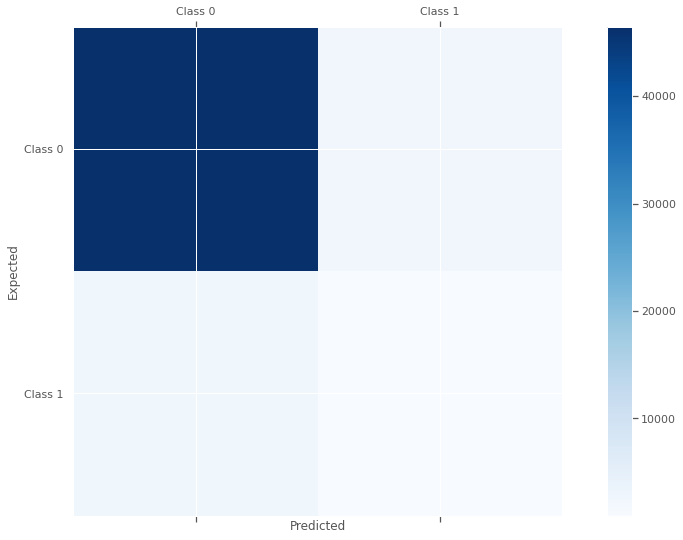

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### 7.- Evaluación

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

model1 = xgb.XGBClassifier() 
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

!pip install catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

model3 = CatBoostClassifier()
model4 = RandomForestClassifier()
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [ ]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=8, n_estimators=20, subsample=0.5)

In [ ]:
model3.fit(X_train, y_train)

Learning rate set to 0.072818
0:	learn: 0.5959106	total: 26.7ms	remaining: 26.7s
1:	learn: 0.5127108	total: 47.1ms	remaining: 23.5s
2:	learn: 0.4466777	total: 67.8ms	remaining: 22.5s
3:	learn: 0.3950292	total: 88.1ms	remaining: 21.9s
4:	learn: 0.3572891	total: 108ms	remaining: 21.4s
5:	learn: 0.3274862	total: 129ms	remaining: 21.3s
6:	learn: 0.3015209	total: 150ms	remaining: 21.3s
7:	learn: 0.2830897	total: 178ms	remaining: 22.1s
8:	learn: 0.2652385	total: 218ms	remaining: 24s
9:	learn: 0.2518241	total: 246ms	remaining: 24.3s
10:	learn: 0.2399915	total: 269ms	remaining: 24.1s
11:	learn: 0.2292492	total: 290ms	remaining: 23.8s
12:	learn: 0.2216885	total: 311ms	remaining: 23.6s
13:	learn: 0.2155740	total: 331ms	remaining: 23.3s
14:	learn: 0.2102535	total: 352ms	remaining: 23.1s
15:	learn: 0.2059133	total: 373ms	remaining: 22.9s
16:	learn: 0.2021704	total: 394ms	remaining: 22.8s
17:	learn: 0.1989583	total: 418ms	remaining: 22.8s
18:	learn: 0.1958879	total: 441ms	remaining: 22.7s
19:	learn

In [ ]:
model4.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [ ]:
model5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Agregabdo un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
import sklearn
sklearn.__version__

from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[48513,   482],
       [ 2827,   678]])

In [ ]:
confusion_matrix(y_test, pred2)

array([[48499,   496],
       [ 2850,   655]])

In [ ]:
confusion_matrix(y_test, pred3)

array([[48437,   558],
       [ 2814,   691]])

In [ ]:
confusion_matrix(y_test, pred4)

array([[48353,   642],
       [ 2822,   683]])

In [ ]:
confusion_matrix(y_test, pred5)

array([[48602,   393],
       [ 2927,   578]])

In [ ]:
confusion_matrix(y_test, pred6)

array([[46142,  2853],
       [ 2521,   984]])

In [ ]:
print(confusion_matrix(y_test, pred1))
print(confusion_matrix(y_test, pred2))
print(confusion_matrix(y_test, pred3))
print(confusion_matrix(y_test, pred4))
print(confusion_matrix(y_test, pred5))
print(confusion_matrix(y_test, pred6))

[[48513   482]
 [ 2827   678]]
[[48499   496]
 [ 2850   655]]
[[48437   558]
 [ 2814   691]]
[[48353   642]
 [ 2822   683]]
[[48602   393]
 [ 2927   578]]
[[46142  2853]
 [ 2521   984]]


In [ ]:
print(classification_report(y_test,pred1))
print(classification_report(y_test,pred2))
print(classification_report(y_test,pred3))
print(classification_report(y_test,pred4))
print(classification_report(y_test,pred5))
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48995
           1       0.58      0.19      0.29      3505

    accuracy                           0.94     52500
   macro avg       0.76      0.59      0.63     52500
weighted avg       0.92      0.94      0.92     52500

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48995
           1       0.57      0.19      0.28      3505

    accuracy                           0.94     52500
   macro avg       0.76      0.59      0.62     52500
weighted avg       0.92      0.94      0.92     52500

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     48995
           1       0.55      0.20      0.29      3505

    accuracy                           0.94     52500
   macro avg       0.75      0.59      0.63     52500
weighted avg       0.92      0.94      0.92     52500

              preci

In [ ]:
df_1 = classification_report(y_test,pred1,output_dict=True)
df_1 = pd.DataFrame(df_1).transpose()

df_2 = classification_report(y_test,pred2,output_dict=True)
df_2 = pd.DataFrame(df_2).transpose()

df_3 = classification_report(y_test,pred3,output_dict=True)
df_3 = pd.DataFrame(df_3).transpose()

df_4 = classification_report(y_test,pred4,output_dict=True)
df_4 = pd.DataFrame(df_4).transpose()

df_5 = classification_report(y_test,pred5,output_dict=True)
df_5 = pd.DataFrame(df_5).transpose()

df_6 = classification_report(y_test,pred6,output_dict=True)
df_6 = pd.DataFrame(df_6).transpose()


In [ ]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [df_1['precision'][1].round(2), df_2['precision'][1].round(2), df_3['precision'][1].round(2),df_4['precision'][1].round(2),df_5['precision'][1].round(2),df_6['precision'][1].round(2)],
                   'recall' : [df_1['recall'][1].round(2), df_2['recall'][1].round(2), df_3['precision'][1].round(2),df_4['precision'][1].round(2),df_5['precision'][1].round(2),df_6['precision'][1].round(2)]})
df

,algorithm,precision,recall
0,XGBoost,0.58,0.19
1,XGBoost Tuneado,0.57,0.19
2,Catboost,0.55,0.55
3,RF,0.52,0.52
4,RF Tuneado,0.60,0.60
5,Arbol de Decision,0.26,0.26


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 1: 93.70
Accuracy for model 2: 93.63
Accuracy for model 3: 93.58
Accuracy for model 4: 93.40
Accuracy for model 5: 93.68
Accuracy for model 6: 89.76


Matriz de Confusión MODELO GANADOR:
 [[48602   393]
 [ 2927   578]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     48995
           1       0.60      0.16      0.26      3505

    accuracy                           0.94     52500
   macro avg       0.77      0.58      0.61     52500
weighted avg       0.92      0.94      0.92     52500



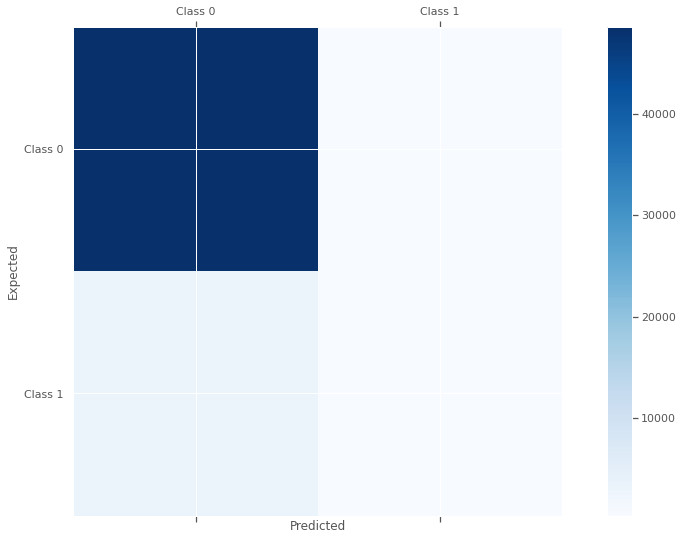

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred5)
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat) #RF Tuneado

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred5))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

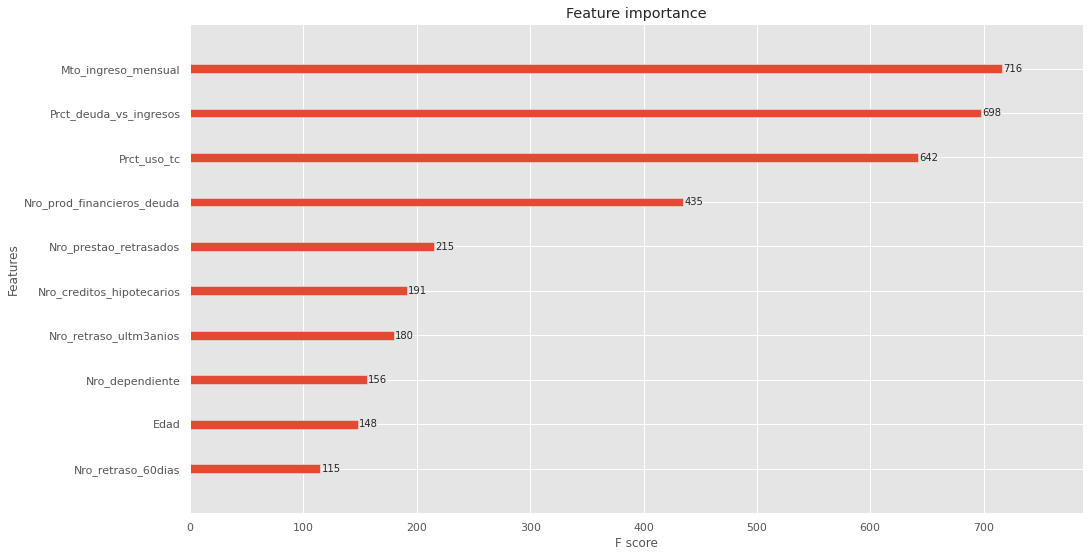

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model2)
pyplot.show()

#### 8.- Despliegue